# Assignment 6

Name 1: Rricha Jalota <br/>
Id 2: 7010592 <br/>
Email id 1: rrja00001 <br/>
<br/>
Name 2: Pavle Markovic<br/>
Id 2: 7007913<br/>
Email id 2: pama00002<br/>

**Instructions:** Read each question carefully. <br/>
Make sure you appropriately comment your code wherever required. Your final submission should contain the completed Notebook and the Python file for exercise 3. There is no need to submit the data files. <br/>
Upload the zipped folder in Teams. Make sure to click on "Turn-in" after your upload your submission, otherwise the assignment will not be considered as submitted. Only one from the group should make the submisssion.

---

## Exercise 1: MLE & MAP  (3 points)

Here is a nice [article](http://pages.cs.wisc.edu/~jerryzhu/cs838/LM.pdf) that explains the difference between MLE and MAP based estimation for language models. 

**1.1 (1 point)**

* Is a MAP estimator always better than MLE? Why is MAP preferred over MLE (explain in context of language modelling)? (0.5 points)

* Some smoothing methods use a MAP estimation of the model parameters. One of these is floor discounting, as described on Slide 44 in Chapter 5. <br/>
Write the formula for deriving the MAP estimate and the resultant formula for floor discounting. What underlying distribution does the language model assume? What is assumed as the prior? (0.5 pts)

**1.2 (2 points)**

Consider the sentences

`s1 = They don't know that we know they know!`

`s2 = Don't we know that?`

* Assume punctuation removal and lowercasing as basic preprocessing steps. Formulate a bigram model (use a circular corpus) on `s1`, note down the conditional probabilities, and use them to determine the probability of `s2`. (0.5 pt)
* Now use floor discounting and form similar bigram models with $\epsilon=1$ and $\epsilon=0.5$, note down the respective bigram probabilities, and use them to determine the probability of `s2`. (1 pt) 
* What do you observe? How does the value of $\epsilon$ influence the MAP prior in both cases? (0.5 pts)

#### Answers

1.1 
* MAP estimator allows one to encode domain information by means of a prior, as it makes use of Bayes rule for parameter estimation. Therefore, it helps in circumventing the data sparseness  problem and can be viewed as a smoothing technique that handles OOV words.  In contrast, MLE uses a frequentist data-driven approach. This means, for an OOV word, it would give a probability of 0. If the training data is large enough and incorporates all possible words that a model will encounter during testing, MLE can be used. But since this is highly unlikely, MAP estimator would be a better choice. In fact, MLE can be seen as a special case of MAP when the prior is uniform.

* Assuming the underlying distribution is multinomial with conjugate Dirichlet prior, 
formula for deriving the MAP estimate:  
$$
P(w|h) = \frac{1}{z}(N(w, h) + \epsilon)
$$

Formula for floor discounting$$
P(w|h) = \frac{N(w, h) + \epsilon}{N(h) + \epsilon \cdot V}
$$
where, 
$N(w, h): $ Frequency of the joint occurence of $h, w$  
$N(h): $ Frequency of $h$  
Discounting parameter, $\epsilon: $  $ [0 \lt \epsilon \leq 1]$

1.2 
* bigrams = ('they', 'dont'), ('dont', 'know'), ('know', 'that'), ('that', 'we'), ('we', 'know'), ('know', 'they'), ('they', 'know'), ('know', 'they')  
P(dont| they) = 1 / 2  
P(know| dont) = 1   
P(that| know) = 1 / 3  
P(we| that) = 1  
P(know| we) = 1  
P(they| know) =  2 / 3  
P(know| they) =  1 / 2  
P(dont we know that) = $P(we|dont) * P(know|we) * P(that|know) * P(dont|that)$ = $0 * 1 * (1/3)  * 0 = 0$ 
<br>

* 
$\epsilon=1$  
P(dont| they) = 1 + 1 / 2 + 1(5) = 2 / 7   
P(know| dont) = 1 + 1/ 1 + 1(5) = 2 / 6    
P(that| know) = 1 + 1 / 3 + 1(5)  = 2 / 8  
P(we| that) = 1  = 1 + 1 / 1 + 1(5) = 2 / 6  
P(know| we) = 1  = 1 + 1 / 1 + 1(5) = 2 / 6   
P(they| know) =  2 / 3  = 2 + 1/ 3 + 1(5) = 3/8  
P(know| they) =  1 / 2  = 1+1/2 + 1(5) = 2/7  
P(dont we know that) = $P(we|dont) * P(know|we) * P(that|know) * P(dont|that)$ = $ 1/5 * 2/6 * 2/8  * 1/5 = 0.00333333333$ 
<br>
$\epsilon=0.5$  
P(dont| they) = 1 + 0.5 / 2 + 0.5(5) = 1.5 / 4.5     
P(know| dont) = 1 + 0.5/ 1 + 0.5(5) = 1.5 / 3.5  
P(that| know) = 1 + 0.5 / 3 + 0.5(5)  = 1.5 / 5.5   
P(we| that) = 1  = 1 + 0.5 / 1 + 0.5(5) = 1.5 / 3.5    
P(know| we) = 1  = 1 + 0.5 / 1 + 0.5(5) = 1.5 / 3.5  
P(they| know) =  2 / 3  = 2 + 0.5/ 3 + 0.5(5) = 2.5 / 5.5    
P(know| they) =  1 / 2  = 1+0.5/2 + 0.5(5) = 1.5 / 4.5  
P(dont we know that) = $P(we|dont) * P(know|we) * P(that|know) * P(dont|that)$ = $ 0.5/2.5 * 1.5/3.5 * 1.5/5.5  * 0.5/2.5 = 0.00467532467$  

* Lower value of $\epsilon$ results in a higher probability of `s2` as it doesn't shift the probability mass from seen to unseen words so much.  

## Exercise 2: Good-Turing (3 points)

#### 2.1: Estimate of unknown words (0.5 points)

Imagine that you're given a split into (1) training data and (2) test data. They come from the same distribution but you're forbidden to make any other splits.

- What is the MLE estimate of frequency of unseen words on (2)?
- What other, better, strategy could be employed to estimate frequency of unseen words from (1) on (2)?

#### 2.2: Data split (0.5 points)

- Usually when preparing a new model, we split the dataset to (1) training data, (2) held-out data and (3) test data. Comment briefly on what each part of the dataset is used for and especially on the distinction between (1) and (2).

#### 2.3: Good-Turing Formula (1 point)

- What is the formula for updated counts for words of frequency $k \ne 0$?
- What is the Good-Turing formula for estimating unseen words, $k=0$?
- Given the updated counts $c^*_k$, how does Good-Turing estimate relate to language model smoothing? How do you define the smoothed distribution?
- Is there any systematic relationship between the original counts and the new counts? e.g. for large enough $k$, $c^*_k \ge k$. 
- Compute and compare the absolute frequencies and Good-Turing estimates for the words `three` and `syringes` in the following text.

```
thirty - three thousand three hundred and thirty silver syringes which cost three hundred and thirty - two crowns . .
```

#### 2.4: Frequent buckets (1 point)

- In your own words, what is the issue with Good-Turing when estimating the new counts for the very frequent words?
- See page 5, paragraph 3 of [Good‐Turing Smoothing Without Tears](http://deanfoster.net/teaching/data_mining/good_turing.pdf) by Gale and Sampson (1995). What solution do they propose?

#### Answers
2.1  The MLE estimate of frequency of unseen words on (2) would be 0. 
*  To estimate frequency of unseen words from (1) on (2), smoothing techniques like floor discounting/Good-turing can be applied. 

2.2 Training data is used for training a model. A model learns its parameters(/behavior) from this data.  
Held-out data is used during training to evaluate the performance of the trained model and prevent it from overfitting/underfitting. It indicates how the trained model would perform on unseen data. During training, the performance of the trained model on this dataset is fedback to decide whether the model should be trained further or not.  
Test data is the unseen data, which is used during inference. On this dataset, a trained model is evaluated on various metrics like accuracy, perplexity, etc. 

2.3 
* updated counts for words of frequency $k \ne 0$, $c_k^{*} =  \frac{(k + 1) N_{k+1}}{N_k}$, where $N_k$ is the frequency of all words that occur with frequency k. 
* for estimating unseen words, k=0,  $P_{GT} =  \frac{N_1}{N}$
* The updated counts in good-turing lowers the actual count of seeing a word and assigns the discounted probability mass to the unseen words. It reallocates the probability mass of n-grams that occur r + 1
times in the training data to the n-grams that occur r times.

* For larger ks, $c^*_k = c_k$  

* Absolute Frequencies 
 'thirty': 3,
 'three': 3,
 'hundred': 2,
 'and': 2,
 'thousand': 1,
 'silver': 1,
 'syringes': 1,
 'which': 1,
 'cost': 1,
 'two': 1,
 'crowns': 1
 
$N_3$ = 2, $N_2$ = 2, $N_1$ = 7, $N_0$ = 7 / 17  

Turing Frequency for:
thirty (occurs thrice) = 4 * N_4 / N_3. Since no word occurs in the corpus 4 times, we assume the Turing frequency of "thirty" to be the same as its absolute frequency = 3.   

Turing Frequency for: 
syringes (occurs once) = 2 * N_2 / N_1 = (2 * 2)/7 = 4/7 = 0.571

While the turing frequency for syringes is only slightly lower than its absolute frequency, the turing frequency for "thirty", which occurs is one of the most frequent words in the corpus, is the same as its absolute frequency. 


2.4
* When estimating the new counts for very frequent words, say k=100, there might not be any word occuring with a frequency of k+1 (i.e. 101), making the new count equal to 0. So, applying the good-turing estimator for higher-order is an issue. 

* They propose a solution that accounts for for the large Nr values, which are zero. They average with each non-zero Nr the zero Nr’s that surround it: order the non-zero Nr by r, and let q, r, and t be successive indices of non-zero values.  They replace Nr by Zr = Nr/0.5 (t−q).  That is, they estimate the expected Nr by the density of Nr for large r. So basically, fit replace the empirical Nr with best-fit power law. 

## Exercise 3: Cross-Validation (4 points)

<!-- ### 3.0 Bible studies -->

Imagine you are a linguist in the remote future who just rediscovered a book called "Bible". To your disappointment the book is obviously incomplete; all the pages between Genesis and the Apocalypse are torn out, maybe by some late Christian cult. Since you don't know the language of the book you want to build a first language model that you can use if you find any of the lost parts. You digitize the book with your state-of-the art portable digitizer, and then load it into one of your Python 10.0 notebooks.

**3.1 Baseline (0.5 points)**

* The two corpora are in the text files `genesis.txt` and `apocalypsis.txt`. Load them into the notebook, preprocess them by removing all non-alphabetical characters, and then concatenate them into a single corpus. Split the corpus into a train and a test set, with the test set comprising the _last_ 20% of the corpus. You may use your code from previous exercises for this. (0.25 points)


In [1]:
from pathlib import Path
from importlib import reload
import exercise_3
exercise_3 = reload(exercise_3)

genesis_text = Path("data/genesis.txt").open('r').read()
apocalypsis_text = Path("data/apocalypsis.txt").open('r').read()

genesis_preprocessed = exercise_3.preprocess(genesis_text)
apocalypsis_preprocessd = exercise_3.preprocess(apocalypsis_text)

corpus = genesis_preprocessed + apocalypsis_preprocessd

train, test = exercise_3.train_test_split_data(corpus)

* Using your language model class from the previous assignment, estimate a trigram language model on the train set and report perplexity on the test. Use $\alpha=1$. Does this represent an unbiased estimate of the model's capacity? (0.25 points)

In [2]:
import lm
lm = reload(lm)

LM = lm.NGramLM(train, test, N=3, alpha=1) 
pp = LM.perplexity()

print(pp)

3680.0267449919775


No, this is not an unbiased estimate of the model's capacity because the training data is biased towards the `genesis.txt` dataset. Since the combined dataset is not shuffled before we split it into train and test, the test set only contains tokens from `apocalypsis.txt`, while training data contains all tokens from `genesis.txt` and 80% tokens from `apocalypsis.txt`.

**3.2 Average Perplexity (2 points)**

* Since you want to get an unbiased estimate of your model's capacity, you decide to apply k-fold cross-validation on your corpus. To do this, implement the function `k_validation_folds` in `exercise_2.py`. Use it to split your corpus into $k=5$ cross-validation folds, and make sure that the folds are of the same size. (1 point)

* Now, estimate a trigram language model on each of the CV folds. You may again use your class from the previous assignment, and average over all perplexity scores. Does the average score differ from the one obtained in 3.2, and why? (1 point)

In [3]:
# 10-fold cross-validation
cv_folds = exercise_3.k_validation_folds(corpus, k_folds=10)

pps = []
# estimate k LMs
for i in range(len(cv_folds)):
    test = cv_folds[i]
    train_list = cv_folds[i-1:i] + cv_folds[i+1:] if i != 0 else cv_folds[i+1:]
    train = [tok for fold in train_list for tok in fold]
    LM = lm.NGramLM(train, test, N=3, alpha=1) 
    pps.append(LM.perplexity())

print(sum(pps)/len(pps))

2428.391210143023


Yes, the average score is now lower than the previous perplexity score. This is because, using k different language models on k different train and test subsets, reduces biasness/overfitting of the model on the training set. 

**3.3 Hyperparameter Tuning (1.5 points)**

* As you don't know anything about the language the book is written in, you have to find the best hyperparemter $\alpha$ for your model by a brute-force search (recall how you did this in the last assignment). Since you know from 3.2 that your data is not balanced, you decide to use only the averaged perplexity score (derived from $k=10$ CV folds) for this. Do so by completing the loop in the code cell below. Then, plot the obtained perplexity scores vs. $\alpha$. You do so by reusing the respective function from Assignment 5. (1 point)

(**Hint:** This could take a while.)

100


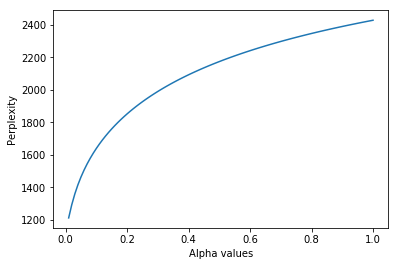

In [4]:
# hyperparamter tuning, CV
alphas = [x*0.01 for x in range(1,101)]

avg_pps = []

for alpha in alphas:
    # estimate LMs!
    pps = []
    for i in range(len(cv_folds)):
        test = cv_folds[i]
        train_list = cv_folds[i-1:i] + cv_folds[i+1:] if i != 0 else cv_folds[i+1:]
        train = [tok for fold in train_list for tok in fold]
        LM = lm.NGramLM(train, test, N=3, alpha=alpha) 
        pps.append(LM.perplexity())
    avg_pps.append(sum(pps)/len(pps))


# plot!
exercise_3.plot_pp_vs_alpha(avg_pps, alphas)

* Repeat the tuning process for unigram and bigram language models. Does your estimate of $\alpha$ differ? Why? (0.5 points)

100
100
100


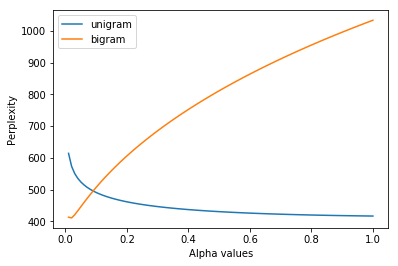

In [5]:
# hyperparamter tuning, bigram + trigram

avg_pps = dict()

def get_avg_pps(N, alphas):
    avg_pps = []
    for alpha in alphas:
        # estimate LMs!
        pps = []
        for i in range(len(cv_folds)):
            test = cv_folds[i]
            train_list = cv_folds[i-1:i] + cv_folds[i+1:] if i != 0 else cv_folds[i+1:]
            train = [tok for fold in train_list for tok in fold]
            LM = lm.NGramLM(train, test, N=N, alpha=alpha) 
            pps.append(LM.perplexity())
        avg_pps.append(sum(pps)/len(pps))
    return avg_pps

avg_pps["unigram"] = get_avg_pps(1, alphas)
avg_pps["bigram"] = get_avg_pps(2, alphas)

# plot!
exercise_3.plot_pp_vs_alpha(avg_pps, alphas)


Yes, with increase in the value of alpha, unigram perplexity decreases whereas the perplexity increases for bigrams and trigrams with increase in alpha. In the unigram case, increasing alpha means we are assigning higher probability mass to unknown words, which is intuitive because not all word-types would be present in the training vocabulary.   